In [24]:
# import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# generate random dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)



In [31]:
# convert to pandas dataframe
iris_data = load_iris()
iris_data['target_variable'] = y



In [32]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=42)


In [33]:
# create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)



In [34]:
# train the model
rf_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, random_state=42)

In [35]:
# make predictions on test data
y_pred = rf_model.predict(X_test)



In [36]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')



In [37]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


In [42]:
# Extract feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

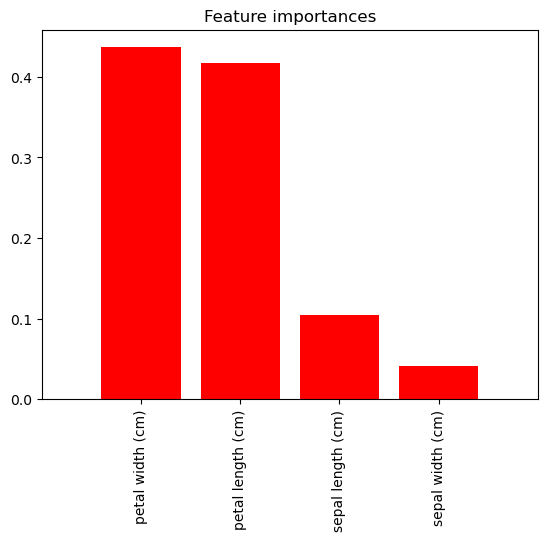

In [45]:
# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(iris_data.feature_names)), importances[indices],
       color="r", align="center")
plt.xticks(range(len(iris_data.feature_names)), [iris_data.feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, len(iris_data.feature_names)])
plt.show()